In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

## Column space

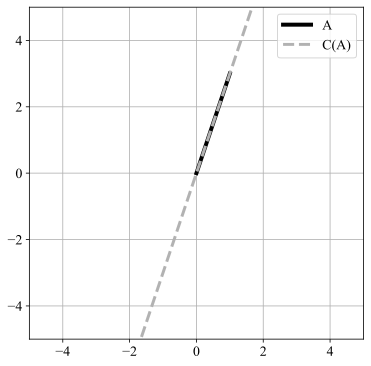

In [2]:
A = np.array([[1], [3]])

xlim = [-5,5]
colspace_p1 = xlim[0]*A
colspace_p2 = xlim[1]*A

plt.figure(figsize=(6,6))

plt.plot([0, A[0,0]], [0, A[1,0]], 'k', linewidth=4, label='A') #원점에서 A : (0, 1) ,(0, 3) 까지 연결
plt.plot([colspace_p1[0,0], colspace_p2[0,0]], [colspace_p1[1,0], colspace_p2[1,0]], 
         '--', linewidth=3, color=[.7,.7,.7], label='C(A)') #원점에서 -5,5배한 열공간 시각화

plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.savefig('Figure_05_01.png', dpi=600)
plt.show()

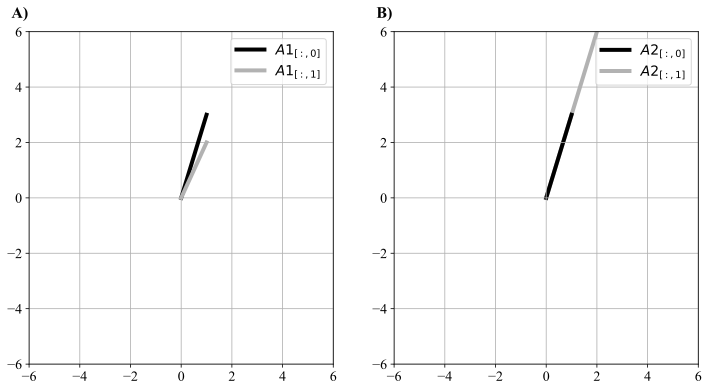

In [3]:
A1 = np.array([[1,1],[3,2]])
A2 = np.array([[1,2],[3,6]])

xlim = [-6,6]
color = [[0,0,0], [.7,.7,.7]]

_, axs = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    axs[0].plot([0, A1[0,i]], [0, A1[1,i]], color=color[i], linewidth=4)
    axs[1].plot([0, A2[0,i]], [0, A2[1,i]], color=color[i], linewidth=4, zorder=-i) #zorder=-i : 두 벡터가 겹칠 경우, 첫번째 벡터를 위에 보이게 조절(값이 클수록 윗순서로 정렬됨)

    axs[i].set_xlim(xlim)
    axs[i].set_ylim(xlim)
    axs[i].grid()
    axs[i].text(xlim[0]-.7, xlim[1]+.5, f'{"AB"[i]})', fontweight='bold', fontsize=16) #f'{"AB"[i]})' : A -> B 순으로 선택됨

for i in [0,1]:axs[i].legend([f'$A{i+1}_{{[:,0]}}$', f'$A{i+1}_{{[:,1]}}$'])

plt.savefig('Figure_05_02.png', dpi=600)
plt.show()


# 결과 해석
## A : 선형 독립, A2 : 선형 종속

# Now for R3

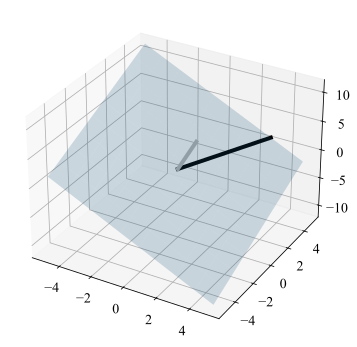

In [4]:
A = np.array([[3,0],
             [5,2],
             [1,2]])

ax = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(-5,5,10), np.linspace(-5,5,10))
cp = np.cross(A[:,0], A[:,1]) # 두 벡터의 외적 계산 -> 평면의 법선 벡터 구하기(수직인 벡터)
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2] # 평면의 방정식(cp[0]*x + cp[1]*y + cp[2]*z = 0) 을 z에 대해 정리
ax.plot_surface(xx,yy, z1, alpha=.2)

ax.plot([0, A[0,0]], [0,A[1,0]], [0, A[2,0]], color=color[0], linewidth=4)
ax.plot([0, A[0,1]], [0,A[1,1]], [0, A[2,1]], color=color[1], linewidth=4)

plt.savefig('Figure_05_03.png', dpi=600)
plt.show()

# Null spaces(영공간)
- 행렬 𝐴에 대해 𝐴⋅𝑥 = 0 을 만족하는 모든 벡터 𝑥들의 집합

In [6]:
A = np.array([[1,-1], [-2,2]]) #서로 선형 종속 -> 계수 = 1(즉, Ax=0이 되는 해가 존재한다)
B = np.array([[1,-1], [-2,3]]) #서로 선형 독립 -> 계수 = 2(즉, Ax=0이 되는 해는 0벡터밖에 없다 = null sapce는 존재하지 않음)

print(scipy.linalg.null_space(A))
print('  ')
print(scipy.linalg.null_space(B))

[[0.70710678]
 [0.70710678]]
  
[]


In [13]:
A[1,0]

np.int64(-2)

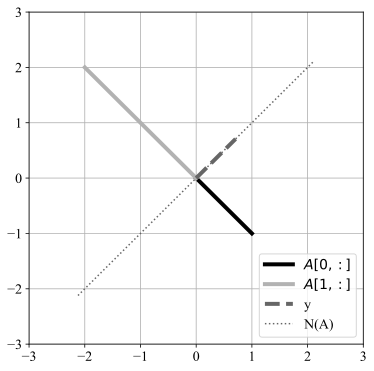

In [11]:
nullvect = scipy.linalg.null_space(A)

xlim = [-3, 3]
color = [[0,0,0], [.7,.7,.7]]

plt.figure(figsize=(6,6))

for i in range(2):
    plt.plot([0, A[i,0]], [0, A[i,1]], color=color[i], linewidth=4, label='$A[{{%g,:}}]$'%i)

plt.plot([0, nullvect[0,0]], [0, nullvect[1,0]], '--', color=[.4,.4,.4], linewidth=4, label='y') #null space 직선

plt.plot([xlim[0]*nullvect[0,0], xlim[1]*nullvect[0,0]],
         [xlim[0]*nullvect[1,0], xlim[1]*nullvect[1,0]],
         ':', color=[.4,.4,.4], label='N(A)') #null space의 전체 선을 길게 그림

plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.legend()

plt.savefig('Figure_05_04.png', dpi=600)
plt.show()